In [6]:
import pandas as pd
import seaborn as sns

In [8]:
df=pd.read_csv('deliveries.csv')
df.columns

Index(['milesTravelled', 'numdeliveries', 'gasPrice', 'traveltime'], dtype='object')

# Correlation b/w columns 
    1. Using Seaborn
    2. Using Pandas
    3. using statsmodels

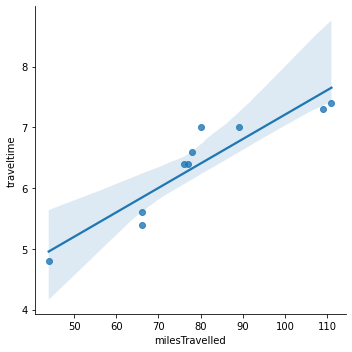

In [9]:
sns.lmplot(x='milesTravelled',y='traveltime',data=df)

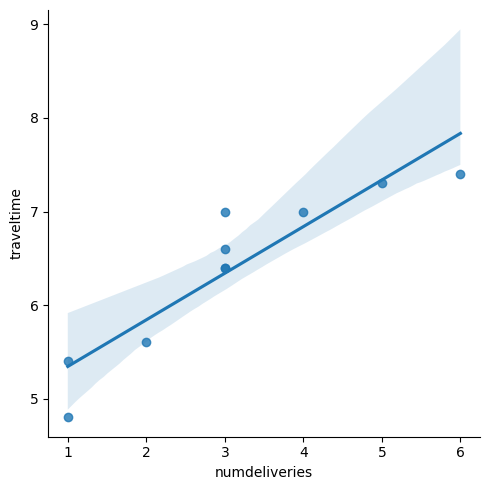

In [10]:
sns.lmplot(x='numdeliveries',y='traveltime',data=df)

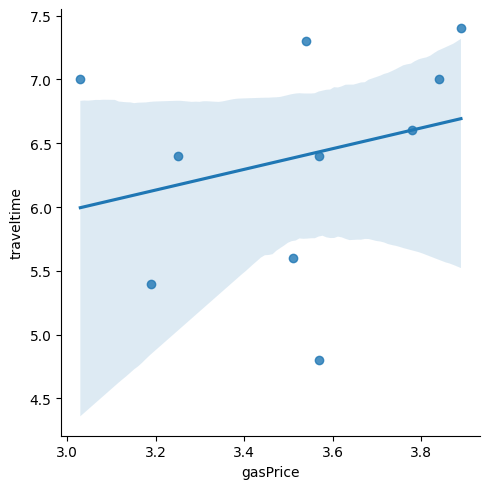

In [11]:
sns.lmplot(x='gasPrice',y='traveltime',data=df)

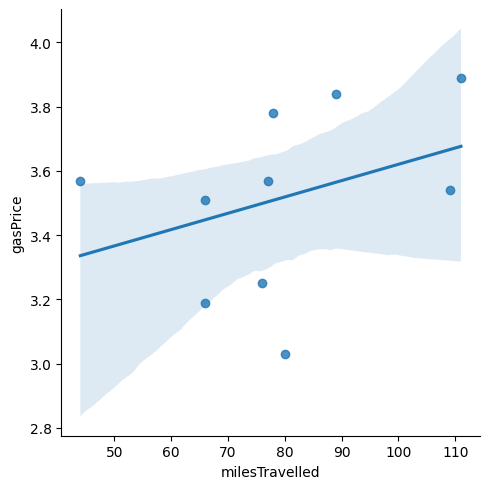

In [13]:
sns.lmplot(x='milesTravelled',y='gasPrice',data=df)

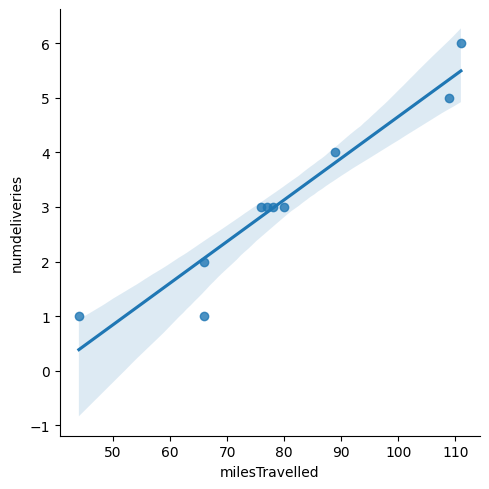

In [14]:
sns.lmplot(x='milesTravelled',y='numdeliveries',data=df)

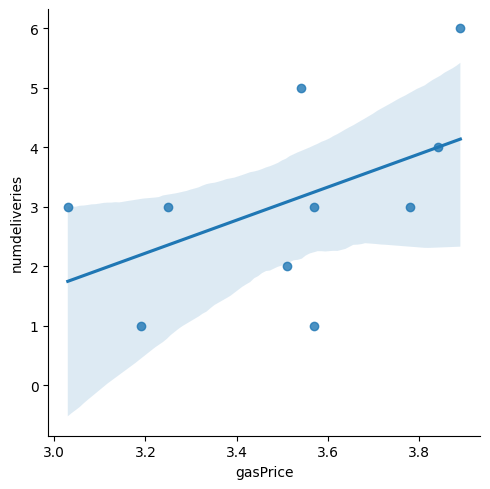

In [15]:
sns.lmplot(x='gasPrice',y='numdeliveries',data=df)

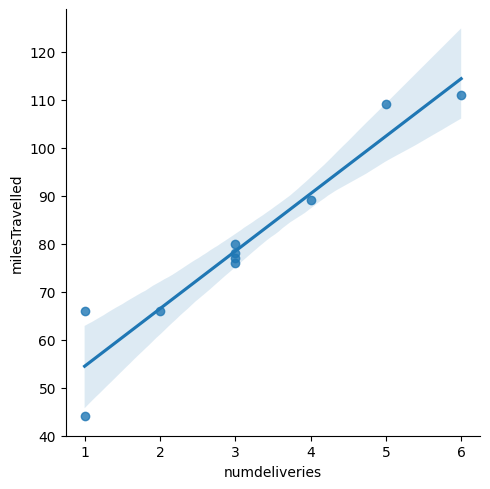

In [16]:
sns.lmplot(x='numdeliveries',y='milesTravelled',data=df) ## Multi Collinearity

*Conclusion for IV and DV*
    - numdeliveries is positively correlated to traveltime
    - milestravelled is positively correlated to traveltime
    - gasPrice is not corelated to traveltime conclusions for IV


In [17]:
df.corr()    ## Corelation Matrix, varies b/w -1 to +1

,milesTravelled,numdeliveries,gasPrice,traveltime
milesTravelled,1.000000,0.955898,0.355796,0.928179
numdeliveries,0.955898,1.000000,0.498242,0.916443
gasPrice,0.355796,0.498242,1.000000,0.267212
traveltime,0.928179,0.916443,0.267212,1.000000


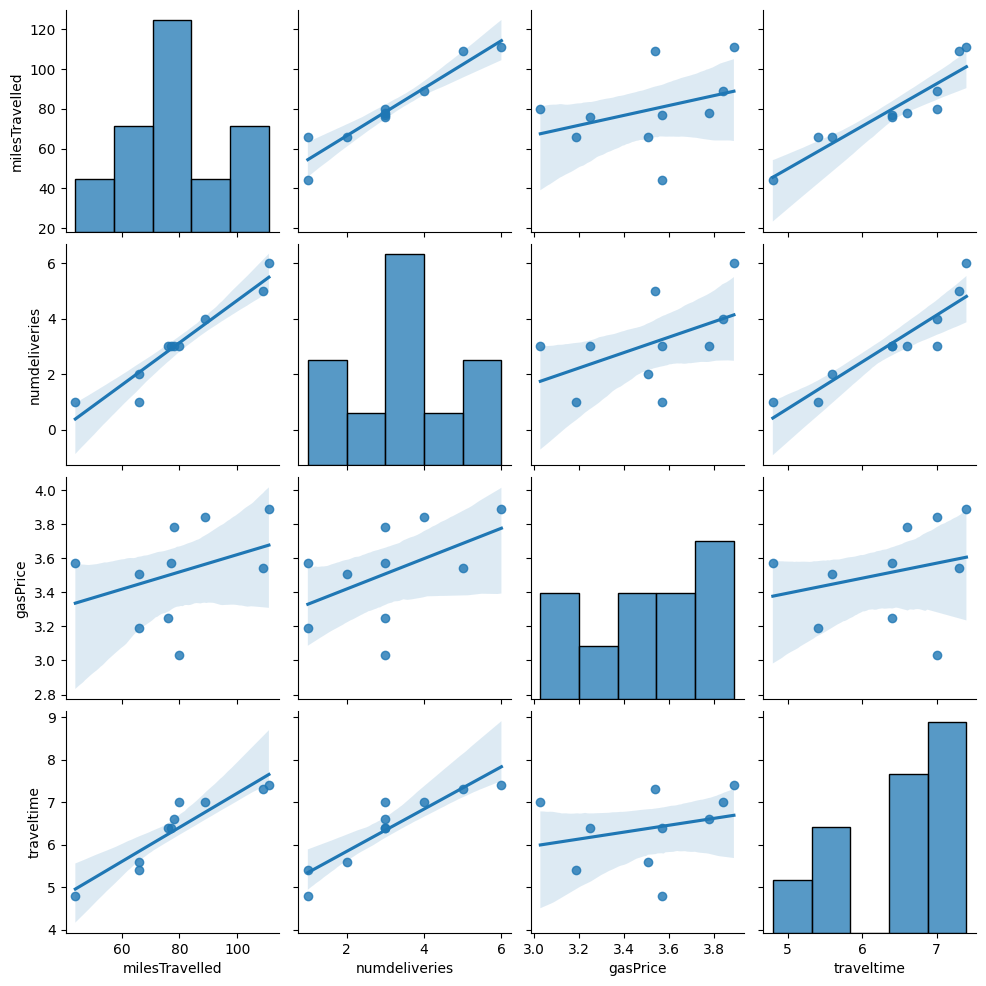

In [18]:
sns.pairplot(df,kind='reg')

In [19]:
from statsmodels.formula.api import ols   ## OLS = Ordinary least Square

In [24]:
print(ols('traveltime~numdeliveries',data=df).fit().summary())


                            OLS Regression Results                            
Dep. Variable:             traveltime   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     41.96
Date:                Sun, 21 Aug 2022   Prob (F-statistic):           0.000193
Time:                        19:26:29   Log-Likelihood:                -3.0794
No. Observations:                  10   AIC:                             10.16
Df Residuals:                       8   BIC:                             10.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         4.8454      0.265     18.261

c:\Users\KumarCha05\Miniconda3\envs\ml\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [25]:
print(ols('traveltime~milesTravelled',data=df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:             traveltime   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     49.77
Date:                Sun, 21 Aug 2022   Prob (F-statistic):           0.000107
Time:                        19:26:36   Log-Likelihood:                -2.3532
No. Observations:                  10   AIC:                             8.706
Df Residuals:                       8   BIC:                             9.312
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.1856      0.467      6.

c:\Users\KumarCha05\Miniconda3\envs\ml\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [26]:
print(ols('traveltime~gasPrice',data=df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:             traveltime   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                 -0.045
Method:                 Least Squares   F-statistic:                    0.6151
Date:                Sun, 21 Aug 2022   Prob (F-statistic):              0.455
Time:                        19:27:45   Log-Likelihood:                -11.868
No. Observations:                  10   AIC:                             27.74
Df Residuals:                       8   BIC:                             28.34
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.5365      3.649      0.969      0.3

c:\Users\KumarCha05\Miniconda3\envs\ml\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


# P Values less 0.05 are less
# fstatic should be  greater

In [27]:
model=ols('traveltime~milesTravelled',data=df).fit()

In [28]:
model.predict(pd.DataFrame({"milesTravelled": [50,100,150,200]}))

0     5.198399
1     7.211238
2     9.224077
3    11.236916
dtype: float64